### Naive Bayes Classifier

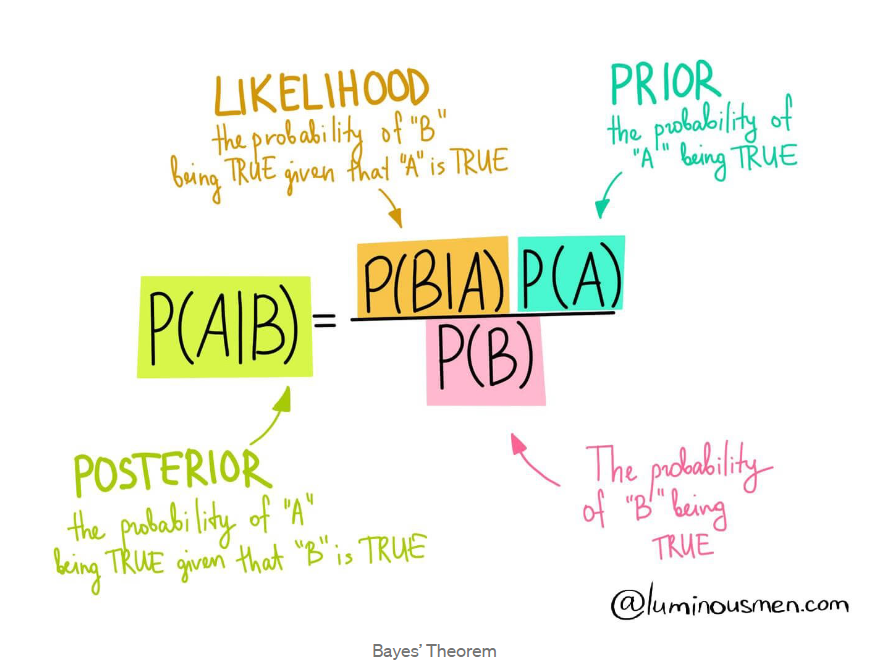

In [2]:
from IPython.display import Image

path=r"C:\Users\serhat.tadik\Downloads\naive_bayes.png"
Image(data = path, width=600)

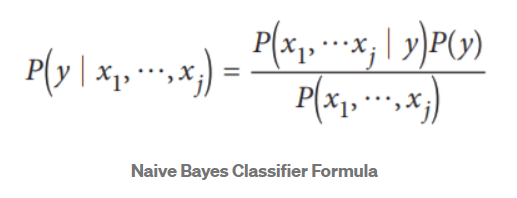

In [3]:
from IPython.display import Image

path=r"C:\Users\serhat.tadik\Downloads\naive_bayes2.png"
Image(data = path, width=400)

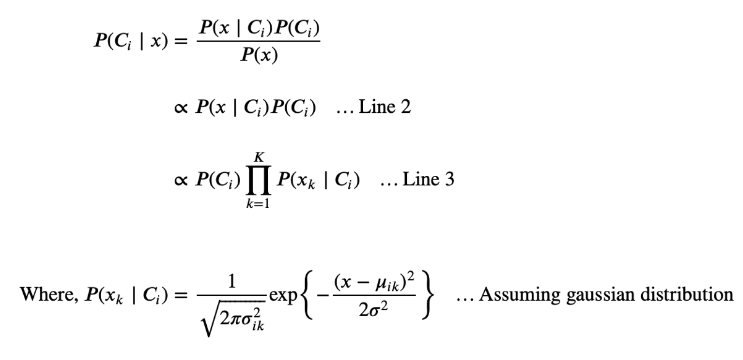

In [32]:
from IPython.display import Image

path=r"C:\Users\serhat.tadik\Downloads\naive_bayes3.png"
Image(data = path, width=700)

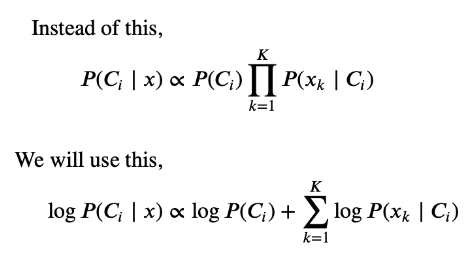

In [34]:
from IPython.display import Image

path=r"C:\Users\serhat.tadik\Downloads\naive_bayes4.png"
Image(data = path, width=500)

In [ ]:
import pandas as pd
import numpy as np
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
      # using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
df =  pd.read_csv(csv_url, names = col_names)

In [ ]:
train = df.sample(frac=0.7, random_state=1)
test = df.drop(train.index)

y_train = train["Class"]
x_train = train.drop("Class", axis=1)
y_test = test["Class"]
x_test = test.drop("Class", axis=1)

In [ ]:
means = (train.groupby(["Class"])).mean()
variance = (train.groupby(["Class"])).var()
prior = (train.groupby(["Class"]).count()/len(train)).iloc[:,1]
classes = np.unique(train["Class"].tolist())

In [ ]:
def Gaussian(x, mu, var):
    return np.e**(-0.5*(x-mu)**2/var)/(np.sqrt(2*np.pi*var))

In [ ]:
def Predict(X):
    predictions = []
    for i in X.index:
        instance = X.loc[i]
        classlikelihood = []
        for cls in classes:
            featurelikelihoods = []
            featurelikelihoods.append(np.log(prior[cls]))
            for col in X.columns:
                x_k = instance[col]
                
                mean = means[col].loc[cls]
                var = variance[col].loc[cls]
                
                likelihood = Gaussian(x_k, mean, var)
                
                if likelihood !=0:
                    likelihood = np.log(likelihood)
                else:
                    likelihood = 0
                
                featurelikelihoods.append(likelihood)
            totallikelihood = sum(featurelikelihoods)
            classlikelihood.append(totallikelihood)
        MaxIndex = classlikelihood.index(max(classlikelihood)) # Find largest posterior position
        Prediction = classes[MaxIndex]
        predictions.append(Prediction)
    return predictions

In [ ]:
y_pred_train = Predict(x_train)
y_pred_test =  Predict(x_test)

In [ ]:
y_pred_train = list(y_pred_train)
y_train = list(y_train)

summ = 0
for i in range(len(y_train)):
    if y_pred_train[i] == y_train[i]:
        summ +=1
accuracy = summ/len(y_train)

In [ ]:
accuracy

In [ ]:
y_pred_test = list(y_pred_test)
y_test = list(y_test)

summ = 0
for i in range(len(y_test)):
    if y_pred_test[i] == y_test[i]:
        summ +=1
accuracy = summ/len(y_test)

In [ ]:
accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print(type(y_test_pred))

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train_pred, y_train)
print(train_accuracy)

test_accuracy = accuracy_score(list(y_test_pred), y_test)
print(test_accuracy)